# B1_T8

The goal of this dataset is to predict how relevant each product are to each customer,to ensure that future recommendations and sales are relevant to the customer.This database contains 22 attributes collected when a company sells a product to the customer.
Here target variable :Column['score']

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing datset to python environment

In [60]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\project team8\dataset1.csv')
#Displaying first 5 rows
df.head()

,user-id,user-age,user-gender,user-nationality,user-knowledge,user-loyalty,user-loan,user-income,user-savings,user-properties,...,user-dependents,user-pension,product-type,product-risk,product-term,product-yield,transaction-id,year,month,score
0,ID500,41,female,local,low,sporadic,no,10822.0,132392.0,0,...,0,483040,bond,medium,30,medium,T5000,2019,9,0.061877
1,ID500,41,female,local,low,sporadic,no,10822.0,132392.0,0,...,0,483040,stock,high,10,high,T5001,2019,10,0.179746
2,ID500,41,female,local,low,sporadic,no,10822.0,132392.0,0,...,0,483040,etf,high,10,high,T5002,2019,9,0.767918
3,ID500,41,female,local,low,sporadic,no,NaN,132392.0,0,...,0,483040,etf,low,20,low,T5003,2017,12,0.606241
4,ID501,25,male,local,low,new,no,5284.0,51806.0,0,...,5,113300,etf,low,1,low,T5004,2019,10,0.829035


Basic information of the dataset

In [61]:
#checking details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11385 entries, 0 to 11384
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user-id            11385 non-null  object 
 1   user-age           11385 non-null  int64  
 2   user-gender        11385 non-null  object 
 3   user-nationality   11385 non-null  object 
 4   user-knowledge     11385 non-null  object 
 5   user-loyalty       11385 non-null  object 
 6   user-loan          11385 non-null  object 
 7   user-income        11373 non-null  float64
 8   user-savings       11380 non-null  float64
 9   user-properties    11385 non-null  int64  
 10  user-riskAversion  11385 non-null  object 
 11  user-marital       11385 non-null  object 
 12  user-dependents    11385 non-null  int64  
 13  user-pension       11385 non-null  int64  
 14  product-type       11385 non-null  object 
 15  product-risk       11385 non-null  object 
 16  product-term       113

In [62]:
#checking column names
df.columns

Index(['user-id', 'user-age', 'user-gender', 'user-nationality',
       'user-knowledge', 'user-loyalty', 'user-loan', 'user-income',
       'user-savings', 'user-properties', 'user-riskAversion', 'user-marital',
       'user-dependents', 'user-pension', 'product-type', 'product-risk',
       'product-term', 'product-yield', 'transaction-id', 'year', 'month',
       'score'],
      dtype='object')

In [63]:
#checking the shape
df.shape


(11385, 22)

In [64]:
df.describe()

,user-age,user-income,user-savings,user-properties,user-dependents,user-pension,product-term,year,month,score
count,11385.000000,11373.000000,11380.000000,11385.000000,11385.000000,1.138500e+04,11385.000000,11385.000000,11385.000000,11385.000000
mean,39.889328,10548.011606,105521.185940,1.454018,0.776372,2.421531e+06,11.700044,2017.357664,6.091787,0.524260
std,9.530080,3842.427608,51689.445766,1.593430,1.425432,2.554458e+06,9.879459,1.201998,3.361180,0.288521
min,21.000000,1505.000000,112.000000,0.000000,0.000000,0.000000e+00,1.000000,2015.000000,1.000000,0.000000
25%,33.000000,7669.000000,66925.000000,0.000000,0.000000,6.184000e+05,5.000000,2016.000000,3.000000,0.251313
50%,39.000000,10402.000000,98438.000000,1.000000,0.000000,1.643700e+06,10.000000,2018.000000,7.000000,0.596343
75%,47.000000,13240.000000,135536.000000,2.000000,1.000000,3.389412e+06,20.000000,2018.000000,9.000000,0.735318
max,74.000000,24330.000000,360259.000000,9.000000,9.000000,2.138323e+07,30.000000,2019.000000,12.000000,1.000000


In [65]:
#checking datatype
df.dtypes

user-id               object
user-age               int64
user-gender           object
user-nationality      object
user-knowledge        object
user-loyalty          object
user-loan             object
user-income          float64
user-savings         float64
user-properties        int64
user-riskAversion     object
user-marital          object
user-dependents        int64
user-pension           int64
product-type          object
product-risk          object
product-term           int64
product-yield         object
transaction-id        object
year                   int64
month                  int64
score                float64
dtype: object

# Exploratory Data Analysis

In [66]:
#our target is the score column.
#we will be doing Univariate and bivariate analysis of each featute column with  the target

In [67]:
df.columns

Index(['user-id', 'user-age', 'user-gender', 'user-nationality',
       'user-knowledge', 'user-loyalty', 'user-loan', 'user-income',
       'user-savings', 'user-properties', 'user-riskAversion', 'user-marital',
       'user-dependents', 'user-pension', 'product-type', 'product-risk',
       'product-term', 'product-yield', 'transaction-id', 'year', 'month',
       'score'],
      dtype='object')

In [70]:
#Separating numerical features .
nf=[feature for feature in df.columns if df[feature].dtype!=object] 
nf

['user-age',
 'user-income',
 'user-savings',
 'user-properties',
 'user-dependents',
 'user-pension',
 'product-term',
 'year',
 'month',
 'score']

array([[<AxesSubplot:title={'center':'user-age'}>,
        <AxesSubplot:title={'center':'user-income'}>,
        <AxesSubplot:title={'center':'user-savings'}>],
       [<AxesSubplot:title={'center':'user-properties'}>,
        <AxesSubplot:title={'center':'user-dependents'}>,
        <AxesSubplot:title={'center':'user-pension'}>],
       [<AxesSubplot:title={'center':'product-term'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'score'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

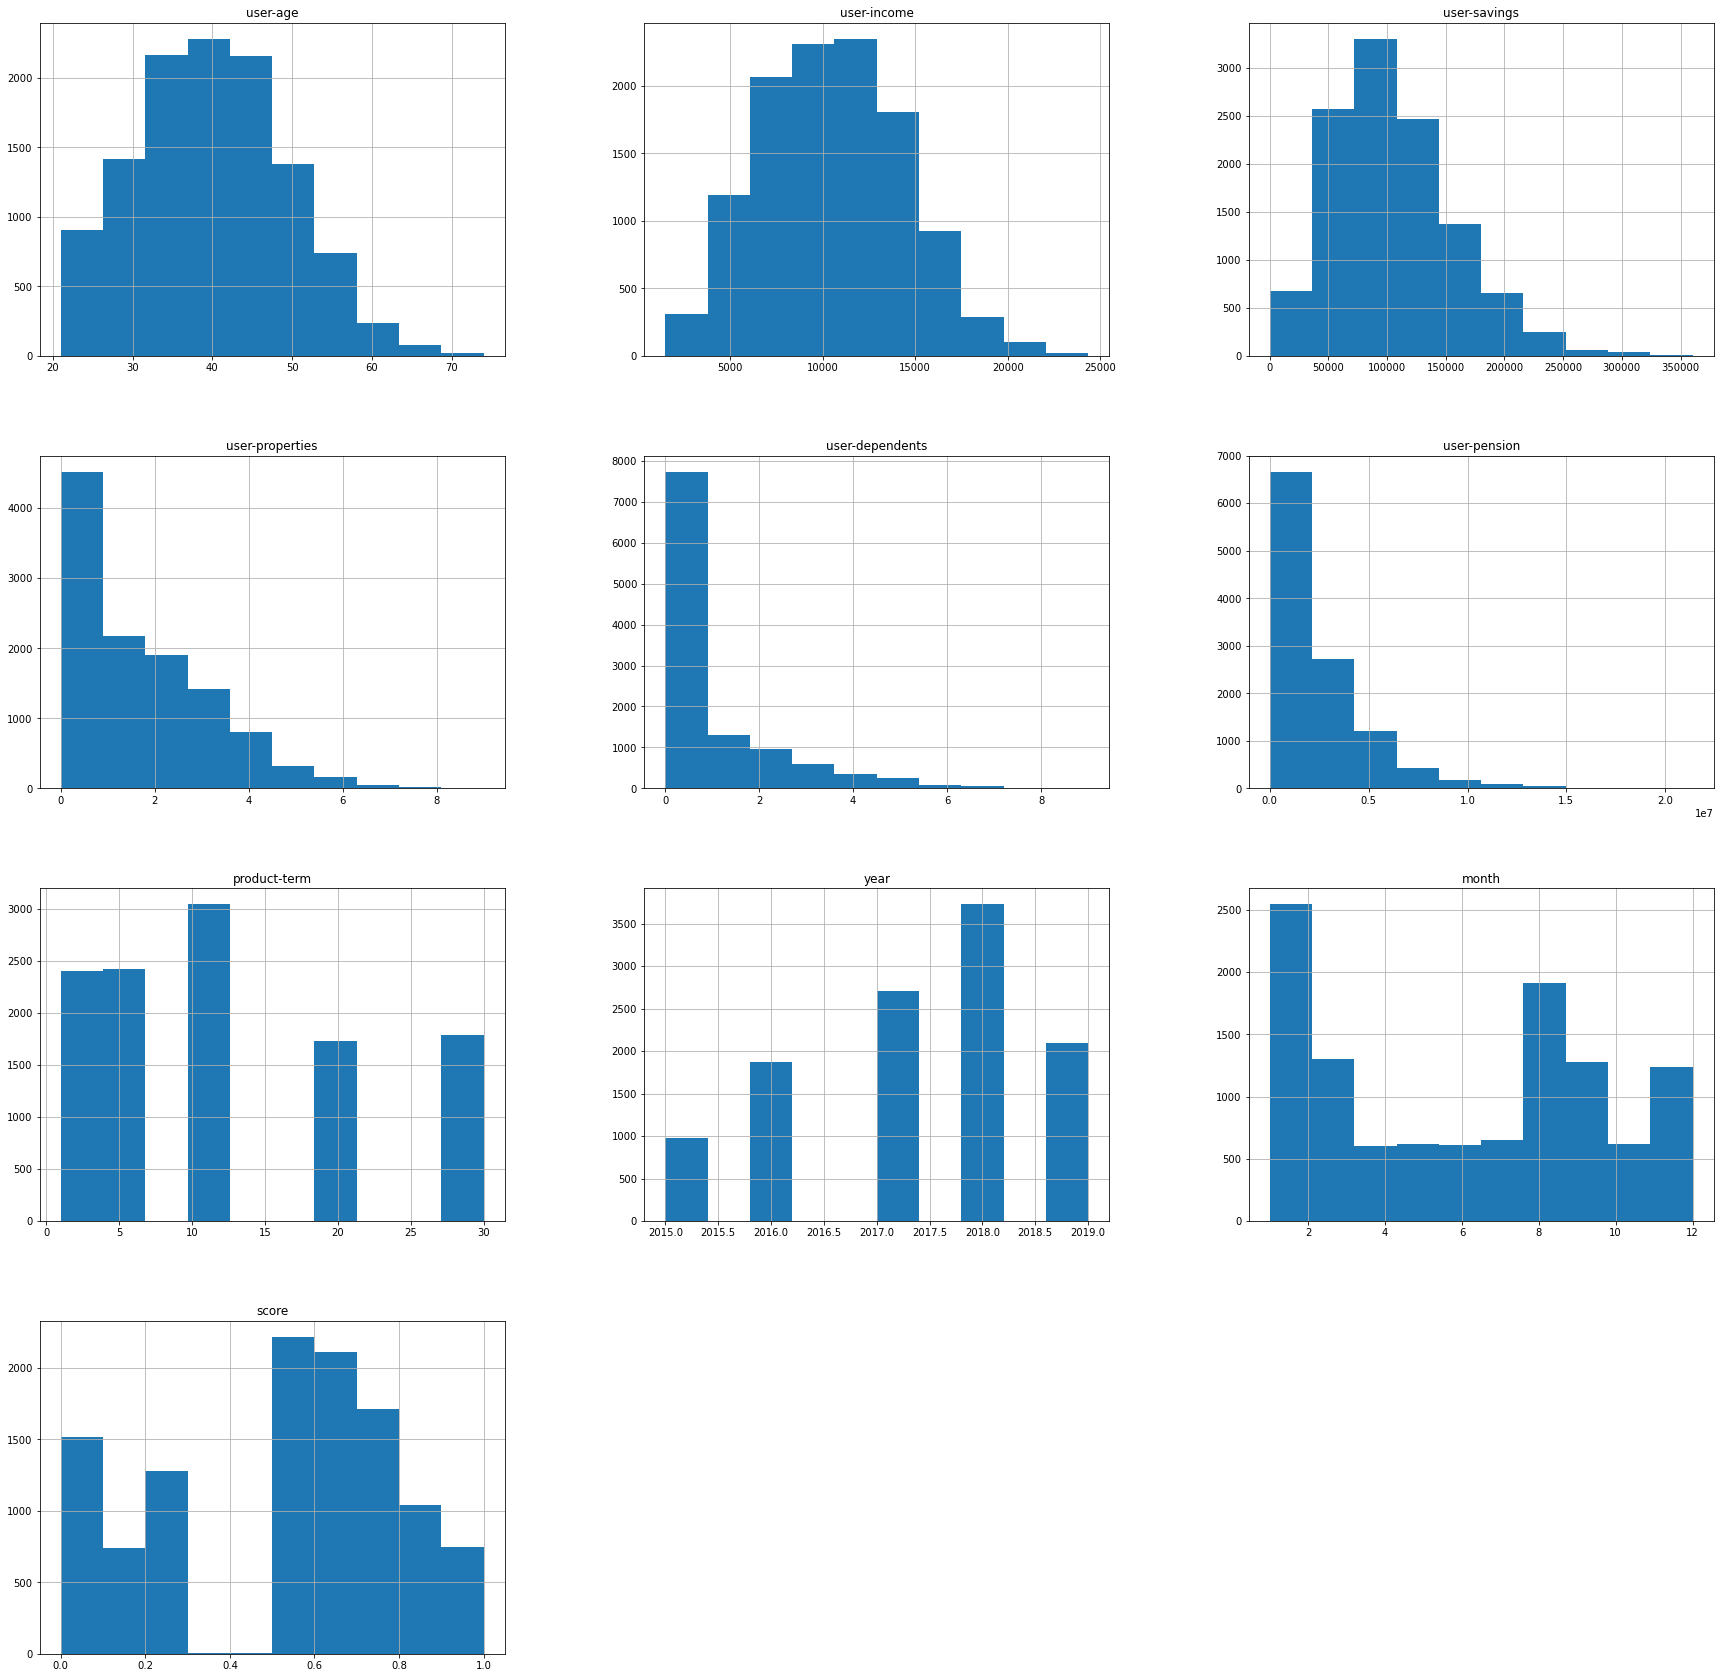

In [71]:
#Analysing numerical columns
df[nf].hist(figsize=(30,30))

In [81]:
#Separating Categorical Columns
cf=[features for features in df1.columns if features not in (nf)]
cf

['user-gender',
 'user-nationality',
 'user-knowledge',
 'user-loyalty',
 'user-loan',
 'user-riskAversion',
 'user-marital',
 'product-type',
 'product-risk',
 'product-yield']

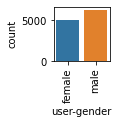

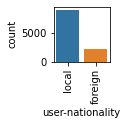

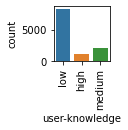

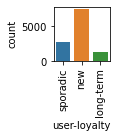

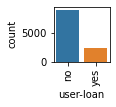

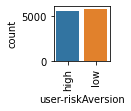

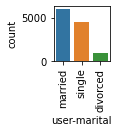

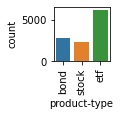

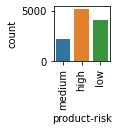

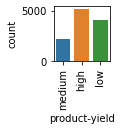

In [84]:
#Analysing Categorical columns
for feature in cf:
    plt.figure(figsize=(1,1))
    ax = sns.countplot(x=feature, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
Inference
1.Male customers dominate
2.Majority of Customers are local people
3.most of the customers are having less knowledge about the product
4.Married people purchase more products
5.Risk is high
6.Product yeild is very high


2.Bivariate Analysis

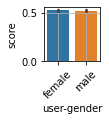

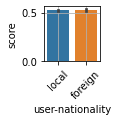

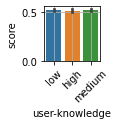

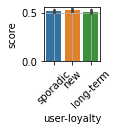

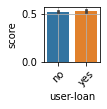

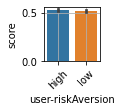

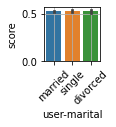

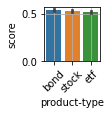

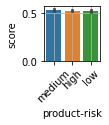

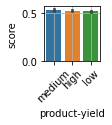

In [123]:
for feature in cf:
    if(feature not in ['user-id','transaction-id','user-age','score','user-pension','user-savings','user-income']):
        plt.figure(figsize=(1,1))
        sns.barplot(x=feature,y='score',data=df)
        plt.grid()
        plt.xticks(rotation=45)
        plt.show()

# Preprocessing

1.Missing value handling

In [8]:
#checking for missing values
df.isna().sum().to_frame()


,0
user-id,0
user-age,0
user-gender,0
user-nationality,0
user-knowledge,0
user-loyalty,0
user-loan,0
user-income,12
user-savings,5
user-properties,0


two columns having missing values.both are numerical values.Here we are using median and forwardfill methods to handle missing values

In [9]:
#Handling Missing Values
df['user-income']=df['user-income'].fillna(df['user-income']).median()
df['user-savings'].ffill(inplace=True)

In [10]:
df.isna().sum().to_frame()

,0
user-id,0
user-age,0
user-gender,0
user-nationality,0
user-knowledge,0
user-loyalty,0
user-loan,0
user-income,0
user-savings,0
user-properties,0


The dataset is free from missing values

2. Outlier Detection and Handling

Text(0.5, 1.0, 'Box plot of Product relevance dataset')

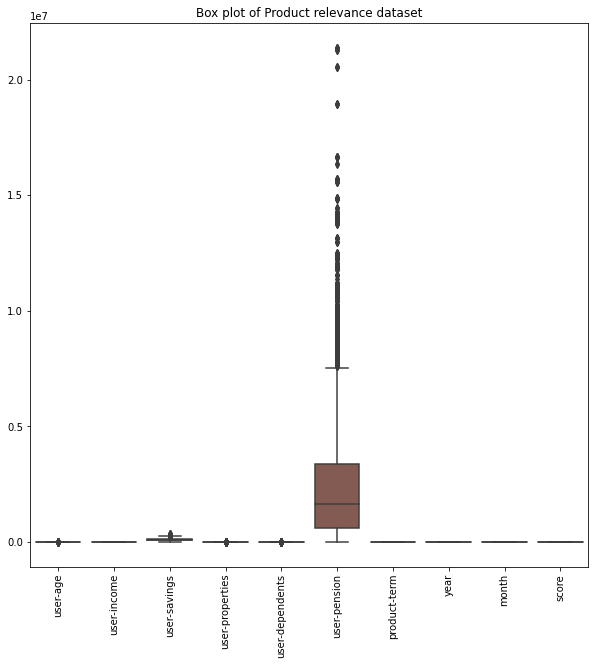

In [11]:
#checking outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box plot of Product relevance dataset')

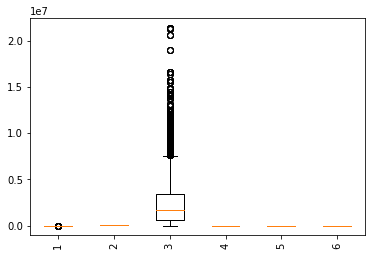

In [12]:
plt.boxplot(df[['user-age','user-income','user-pension','year','month','score']])
plt.xticks(rotation=90)
plt.show()

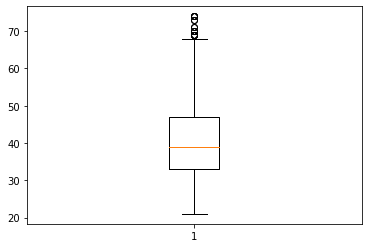

In [13]:

plt.boxplot(df[['user-age']])
plt.show()

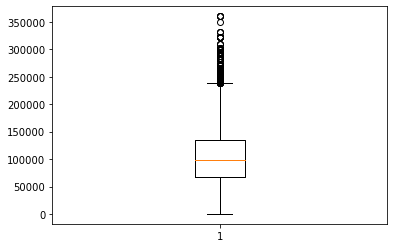

In [14]:
plt.boxplot(df[['user-savings']])
plt.show()


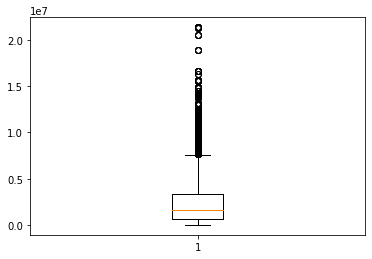

In [15]:
plt.boxplot(df[['user-pension']])
plt.show()

In this dataset 3 columns (user-age,user-savings,user-pension) are having outliers.Outliers in user-age column can be negleced.We have to remove Outliers from user-pension and user-savings

In [16]:
#Finding Quartiles of user-pension
q1=np.percentile(df['user-pension'],25,interpolation='midpoint')
q2=np.percentile(df['user-pension'],50,interpolation='midpoint')
q3=np.percentile(df['user-pension'],75,interpolation='midpoint')
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)

Q1: 618400.0
Q2: 1643700.0
Q3: 3389412.0


In [17]:
#Finding Inter Qurtile Range
IQR=q3-q1
print('IQR:',IQR)
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print('lower limit:',low_lim)
print('upper limit:',up_lim)

IQR: 2771012.0
lower limit: -3538118.0
upper limit: 7545930.0


In [18]:
outlier=[]
for x in df['user-pension']:
    if x>up_lim or x<low_lim:
        outlier.append(x)
ind=df['user-pension']  > up_lim
df.loc[ind].index

Int64Index([   22,    23,   164,   165,   232,   314,   344,   345,   493,
              494,
            ...
            11166, 11167, 11168, 11180, 11181, 11182, 11183, 11251, 11252,
            11253],
           dtype='int64', length=510)

In [19]:
df.drop(df[(df['user-pension']  > up_lim)].index,inplace=True)
df.shape

(10875, 22)

{'whiskers': [<matplotlib.lines.Line2D at 0xebb5a7afa0>,
 'caps': [<matplotlib.lines.Line2D at 0xebb5a87700>,
 'boxes': [<matplotlib.lines.Line2D at 0xebb5a7ac10>],
 'medians': [<matplotlib.lines.Line2D at 0xebb5a87e20>],
 'fliers': [<matplotlib.lines.Line2D at 0xebb5a941f0>],
 'means': []}

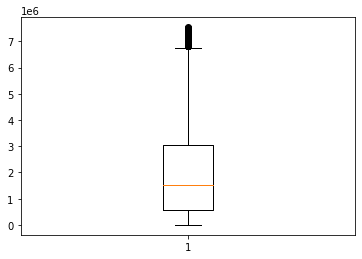

In [20]:
plt.boxplot(df['user-pension'])

In [21]:
#Finding Quartiles of user-savings
q1=np.percentile(df['user-savings'],25,interpolation='midpoint')
q2=np.percentile(df['user-savings'],50,interpolation='midpoint')
q3=np.percentile(df['user-savings'],75,interpolation='midpoint')
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)

Q1: 65226.5
Q2: 96065.0
Q3: 130829.5


In [22]:
#Finding Inter Qurtile Range
IQR=q3-q1
print('IQR:',IQR)
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print('lower limit:',low_lim)
print('upper limit:',up_lim)

IQR: 65603.0
lower limit: -33178.0
upper limit: 229234.0


In [23]:
outlier=[]
for x in df['user-savings']:
    if x>up_lim or x<low_lim:
        outlier.append(x)
ind=df['user-savings']  > up_lim
df.loc[ind].index

Int64Index([  161,   162,   163,   346,   347,   635,   636,   641,   642,
              756,
            ...
            11160, 11161, 11162, 11163, 11164, 11307, 11308, 11309, 11310,
            11311],
           dtype='int64', length=149)

In [24]:
df.drop(df[(df['user-savings']  > up_lim)].index,inplace=True)
df.shape

(10726, 22)

{'whiskers': [<matplotlib.lines.Line2D at 0xebb5af2070>,
 'caps': [<matplotlib.lines.Line2D at 0xebb5af2790>,
 'boxes': [<matplotlib.lines.Line2D at 0xebb5ae2ca0>],
 'medians': [<matplotlib.lines.Line2D at 0xebb5af2eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0xebb5aff280>],
 'means': []}

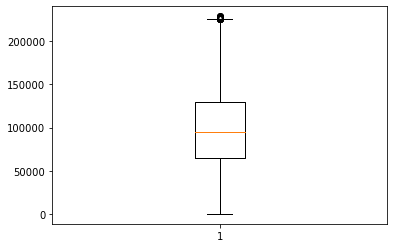

In [25]:
plt.boxplot(df['user-savings'])

Outliers in user pension column and user savings columns are removed

3.Encoding

In [26]:
df.columns


Index(['user-id', 'user-age', 'user-gender', 'user-nationality',
       'user-knowledge', 'user-loyalty', 'user-loan', 'user-income',
       'user-savings', 'user-properties', 'user-riskAversion', 'user-marital',
       'user-dependents', 'user-pension', 'product-type', 'product-risk',
       'product-term', 'product-yield', 'transaction-id', 'year', 'month',
       'score'],
      dtype='object')

In [27]:
df=df.drop(['transaction-id','user-id','year','month'],axis=1)

In [28]:
df[df.select_dtypes(include=['object']).columns.tolist()].nunique()

user-gender          2
user-nationality     2
user-knowledge       3
user-loyalty         3
user-loan            2
user-riskAversion    2
user-marital         3
product-type         3
product-risk         3
product-yield        3
dtype: int64

In [29]:
#In this dataset we are using onehot encoding because all columns are having 2 or 3 unique values

In [30]:
df1=df
df=pd.get_dummies(df)

In [31]:
df.head()

,user-age,user-income,user-savings,user-properties,user-dependents,user-pension,product-term,score,user-gender_female,user-gender_male,...,user-marital_single,product-type_bond,product-type_etf,product-type_stock,product-risk_high,product-risk_low,product-risk_medium,product-yield_high,product-yield_low,product-yield_medium
0,41,10402.0,132392.0,0,0,483040,30,0.061877,1,0,...,0,1,0,0,0,0,1,0,0,1
1,41,10402.0,132392.0,0,0,483040,10,0.179746,1,0,...,0,0,0,1,1,0,0,1,0,0
2,41,10402.0,132392.0,0,0,483040,10,0.767918,1,0,...,0,0,1,0,1,0,0,1,0,0
3,41,10402.0,132392.0,0,0,483040,20,0.606241,1,0,...,0,0,1,0,0,1,0,0,1,0
4,25,10402.0,51806.0,0,5,113300,1,0.829035,0,1,...,1,0,1,0,0,1,0,0,1,0


In [32]:
df.shape

(10726, 34)

4.Feature Reduction

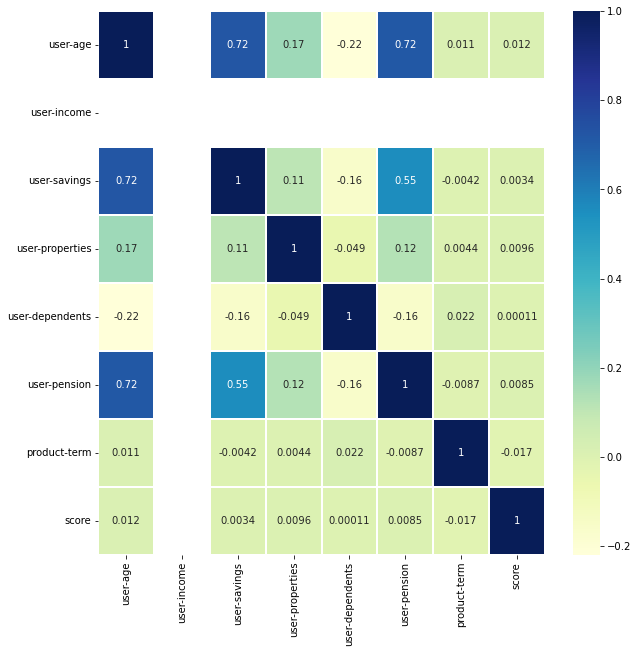

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,cmap="YlGnBu")
plt.show()

In [34]:
# user-savings and user-dependents are negatively correlated.so we can drop user dependents.
# user pension and user age are positively coerrelated. so we can drop user pension.


In [35]:
df.columns

Index(['user-age', 'user-income', 'user-savings', 'user-properties',
       'user-dependents', 'user-pension', 'product-term', 'score',
       'user-gender_female', 'user-gender_male', 'user-nationality_foreign',
       'user-nationality_local', 'user-knowledge_high', 'user-knowledge_low',
       'user-knowledge_medium', 'user-loyalty_long-term', 'user-loyalty_new',
       'user-loyalty_sporadic', 'user-loan_no', 'user-loan_yes',
       'user-riskAversion_high', 'user-riskAversion_low',
       'user-marital_divorced', 'user-marital_married', 'user-marital_single',
       'product-type_bond', 'product-type_etf', 'product-type_stock',
       'product-risk_high', 'product-risk_low', 'product-risk_medium',
       'product-yield_high', 'product-yield_low', 'product-yield_medium'],
      dtype='object')

In [36]:
df=df.drop(['user-dependents','user-pension'],axis=1)
df.head()

,user-age,user-income,user-savings,user-properties,product-term,score,user-gender_female,user-gender_male,user-nationality_foreign,user-nationality_local,...,user-marital_single,product-type_bond,product-type_etf,product-type_stock,product-risk_high,product-risk_low,product-risk_medium,product-yield_high,product-yield_low,product-yield_medium
0,41,10402.0,132392.0,0,30,0.061877,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,41,10402.0,132392.0,0,10,0.179746,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,41,10402.0,132392.0,0,10,0.767918,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,41,10402.0,132392.0,0,20,0.606241,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,25,10402.0,51806.0,0,1,0.829035,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


5.Feature Engineering

In [37]:
df['user-expenditure']=df['user-income']-df['user-savings']

In [38]:
df.head()

,user-age,user-income,user-savings,user-properties,product-term,score,user-gender_female,user-gender_male,user-nationality_foreign,user-nationality_local,...,product-type_bond,product-type_etf,product-type_stock,product-risk_high,product-risk_low,product-risk_medium,product-yield_high,product-yield_low,product-yield_medium,user-expenditure
0,41,10402.0,132392.0,0,30,0.061877,1,0,0,1,...,1,0,0,0,0,1,0,0,1,-121990.0
1,41,10402.0,132392.0,0,10,0.179746,1,0,0,1,...,0,0,1,1,0,0,1,0,0,-121990.0
2,41,10402.0,132392.0,0,10,0.767918,1,0,0,1,...,0,1,0,1,0,0,1,0,0,-121990.0
3,41,10402.0,132392.0,0,20,0.606241,1,0,0,1,...,0,1,0,0,1,0,0,1,0,-121990.0
4,25,10402.0,51806.0,0,1,0.829035,0,1,0,1,...,0,1,0,0,1,0,0,1,0,-41404.0


In [39]:
#here we are creating a new column 'user-expenditure',which helps to find the product relevance

In [40]:
#spliting data into independent and dependent dataset
X=df.drop(['score'],axis=1)
y=df['score']

6.Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [42]:
#here scaling is done with minmaxscalar

# 4.Modelling

In [95]:
#Splitting the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
X_train.shape

(7508, 32)

In [97]:
#Linear Regression Model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.08458944464738459


In [100]:
from sklearn.metrics import r2_score
print('R square value is:',r2_score(y_test,predictions))

R square value is: -0.0032636827283298864


In [108]:
#Ridge Regression model
from sklearn.linear_model import Ridge
rr=Ridge()
model=rr.fit(X_train,y_train)
prediction1=model.predict(X_test)

In [109]:
print('MSE is',mean_squared_error(y_test,prediction1))

MSE is 0.08458775173349595


In [111]:
print('R square value is:',r2_score(y_test,prediction1))

R square value is: -0.0032436041117891445


In [112]:
#Lasso Regression model
from sklearn.linear_model import Lasso
lasso=Lasso()
model2=lasso.fit(X_train,y_train)
prediction2=model2.predict(X_test)
print('MSE is',mean_squared_error(y_test,prediction2))
print('R square value is:',r2_score(y_test,prediction2))

MSE is 0.08433368202747807
R square value is: -0.0002302386736809936


In [ ]:
#Among the three models Lassoregression model provides minimum MSE value

# Hyper parameter tuning

In [124]:
from pprint import pprint

lr=linear_model.LinearRegression()

print('Parameters currently in use:\n')
pprint(lr.get_params())

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}


In [126]:
from pprint import pprint

lr=linear_model.Ridge()

print('Parameters currently in use:\n')
pprint(rr.get_params())


Parameters currently in use:

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


LassoRegression model is the best model